# ParallelBNs: Experimentos 16/05/2022

In [207]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_info_rows = 30000000

sns.set_theme(style='darkgrid')

# Tamaño figuras
plt.rcParams["figure.figsize"] = (25,10)

In [230]:
df = pd.read_csv('results-16-5.csv')
df['threads'] = pd.Categorical(df.threads)
df

,algorithm,network,bbdd,threads,interleaving,seed,SHD,LL Score,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
0,GES_BNBuilder,alarm,alarm.xbif50001246_,1,-1,-1,20,-0.286967,-57646.025031,46.0,12.0,34.0,1,7.064
1,PGESwithStages,alarm,alarm.xbif50001246_,2,10,11,18,-0.500475,-57044.771012,42.0,10.0,32.0,5,5.224
2,PGESwithStages,alarm,alarm.xbif50001246_,2,10,13,17,-0.377120,-57132.277361,46.0,14.0,32.0,6,5.982
3,PGESwithStages,alarm,alarm.xbif50001246_,2,10,17,18,-0.499314,-57070.092644,42.0,10.0,32.0,5,5.128
4,PGESwithStages,alarm,alarm.xbif50001246_,2,10,19,16,-0.379259,-57066.175171,42.0,10.0,32.0,6,5.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17608,PGESwithStages,win95pts,win95pts.xbif_,8,5,23,112,-0.233366,-49885.882451,242.0,82.0,160.0,9,25.804
17609,PGESwithStages,win95pts,win95pts.xbif_,8,5,29,110,-0.213639,-49698.371654,246.0,76.0,170.0,9,24.549
17610,PGESwithStages,win95pts,win95pts.xbif_,8,5,3,89,-0.229445,-49596.603900,206.0,58.0,148.0,9,26.898
17611,PGESwithStages,win95pts,win95pts.xbif_,8,5,5,115,-0.229383,-49694.550021,258.0,84.0,174.0,9,27.164


Media de tiempo de ejecución

In [209]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
df_unstack = df.drop(["algorithm", "bbdd", "interleaving", "seed", "SHD", "LL Score", "BDeu Score", "dfMM", "dfMM plus", "dfMM minus", "Total iterations"], axis=1)
df_unstack.groupby(["network", "threads"]).mean().unstack(0)


Total time(s)                                                        \
network         alarm        andes    barley    cancer     child earthquake   
threads                                                                       
1            6.785727  1507.229636  9.631636  0.316909  1.970909   0.337091   
2            6.012888   706.196851  7.356558  0.318945  1.821615   0.341145   
4            4.195142   320.998463  4.773373  0.300448  1.485015   0.327161   
6            4.517530   287.652838  5.566739  0.313439  1.689915   0.334755   
8            4.668609   288.697073  5.024482  0.323145  1.698636   0.343991   

                                                                               \
network hailfinder     hepar2 insurance          link    mildew         munin   
threads                                                                         
1        20.984818  22.496636  4.121455           NaN  3.420273           NaN   
2        14.056821  16.623988  3.905748  12034.598000  2.679003           NaN   
4         7.933879   9.146621  3.127055   6514.598000  1.851097           NaN   
6         8.134179   8.993058  3.392906   4653.817000  1.905382           NaN   
8         7.681239   8.775964  3.656064   3863.539867  1.843855  42128.062857   

                                            
network          pigs     water   win95pts  
threads                                     
1        26745.446000  3.066727  72.088000  
2        11415.393458  2.578900  49.838709  
4         5156.145952  1.782364  27.608930  
6         4288.880785  1.822100  28.381668  
8         4234.856837  1.899524  27.981091

Número de ejecuciones

In [210]:
df_unstack.groupby(["network", "threads"]).count().unstack(0)

Total time(s)                                                         \
network         alarm andes barley cancer child earthquake hailfinder hepar2   
threads                                                                        
1                  11    11     11     11    11         11         11     11   
2                 330   329    330    330   330        330        330    330   
4                 330   324    330    330   330        330        330    330   
6                 330   328    330    330   330        330        330    330   
8                 330   328    330    330   330        330        330    330   

                                                         
network insurance link mildew munin pigs water win95pts  
threads                                                  
1              11    0     11     0   11    11       11  
2             330    1    330     0  325   330      330  
4             330    1    330     0  330   330      328  
6             330    1    330     0  326   330      328  
8             330  330    330     7  325   330      329

Borramos ``link`` y ``munin``:

In [211]:
df = df[(df["network"] != "link") & (df["network"] != "munin")]
df

,algorithm,network,bbdd,threads,interleaving,seed,SHD,LL Score,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
0,GES_BNBuilder,alarm,alarm.xbif50001246_,1,-1,-1,20,-0.286967,-57646.025031,46.0,12.0,34.0,1,7.064
1,PGESwithStages,alarm,alarm.xbif50001246_,2,10,11,18,-0.500475,-57044.771012,42.0,10.0,32.0,5,5.224
2,PGESwithStages,alarm,alarm.xbif50001246_,2,10,13,17,-0.377120,-57132.277361,46.0,14.0,32.0,6,5.982
3,PGESwithStages,alarm,alarm.xbif50001246_,2,10,17,18,-0.499314,-57070.092644,42.0,10.0,32.0,5,5.128
4,PGESwithStages,alarm,alarm.xbif50001246_,2,10,19,16,-0.379259,-57066.175171,42.0,10.0,32.0,6,5.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17608,PGESwithStages,win95pts,win95pts.xbif_,8,5,23,112,-0.233366,-49885.882451,242.0,82.0,160.0,9,25.804
17609,PGESwithStages,win95pts,win95pts.xbif_,8,5,29,110,-0.213639,-49698.371654,246.0,76.0,170.0,9,24.549
17610,PGESwithStages,win95pts,win95pts.xbif_,8,5,3,89,-0.229445,-49596.603900,206.0,58.0,148.0,9,26.898
17611,PGESwithStages,win95pts,win95pts.xbif_,8,5,5,115,-0.229383,-49694.550021,258.0,84.0,174.0,9,27.164


### (Threads==1 es GES, Threads>1 es PGES)

Media

In [212]:
df.groupby(["threads","interleaving"], observed=True).mean().drop(["seed"],axis=1)

SHD  LL Score     BDeu Score        dfMM  \
threads interleaving                                                   
1       -1            57.685315 -0.422289 -271958.993005  136.825175   
2        5            55.377622 -0.494814 -271358.910874  131.104895   
         10           56.677871 -0.499689 -270321.690415  134.355742   
         15           56.397616 -0.492496 -267395.597559  133.998597   
4        5            56.075630 -0.502154 -271167.688771  133.067227   
         10           56.868439 -0.501026 -271394.356627  135.154654   
         15           56.882807 -0.505932 -271446.191250  135.287018   
6        5            57.335899 -0.497240 -271719.342374  136.011197   
         10           57.378416 -0.498943 -270610.861867  136.835319   
         15           58.152875 -0.499799 -268484.572854  138.479663   
8        5            57.632168 -0.493986 -271598.998374  136.946853   
         10           58.518544 -0.497050 -271532.023221  139.363191   
         15           57.750527 -0.490324 -266613.789708  137.992973   

                      dfMM plus  dfMM minus  Total iterations  Total time(s)  
threads interleaving                                                          
1       -1            18.559441  118.265734          1.000000    2184.453524  
2        5            14.874126  116.230769         15.658741     948.194934  
         10           17.000000  117.355742          9.963585     933.141330  
         15           16.882188  117.116410          8.128331     903.733092  
4        5            16.896359  116.170868         10.614846     430.620587  
         10           18.075577  117.079076          7.819454     424.264077  
         15           18.217544  117.069474          7.007018     424.499749  
6        5            18.443667  117.567530          8.758572     351.928921  
         10           19.515067  117.320252          7.025228     350.618006  
         15           20.189341  118.290323          6.685835     358.132701  
8        5            19.573427  117.373427          7.833566     348.683394  
         10           20.813156  118.550035          6.750875     344.500846  
         15           20.133521  117.859452          6.427266     352.192584

Desviación estándar

In [213]:
df.groupby(["threads","interleaving"], observed=True).std().drop(["seed"],axis=1)

SHD  LL Score     BDeu Score        dfMM  \
threads interleaving                                                   
1       -1            49.647833  0.320265  440996.440742  116.991953   
2        5            49.461326  0.358788  438411.065266  116.847817   
         10           51.147956  0.359802  437216.842535  120.556068   
         15           50.607478  0.353670  432358.146150  119.820392   
4        5            49.371309  0.360365  438705.743958  117.162474   
         10           51.372393  0.354624  438705.601643  121.298284   
         15           52.282370  0.354619  439172.898284  123.335353   
6        5            51.318339  0.353363  438649.850386  121.248777   
         10           52.363050  0.351982  437417.111252  124.489072   
         15           51.874982  0.351805  434343.491919  122.380230   
8        5            51.849803  0.347381  438570.744841  122.468756   
         10           52.758293  0.347294  438851.999922  124.114546   
         15           51.435624  0.345632  431267.608850  121.559799   

                      dfMM plus  dfMM minus  Total iterations  Total time(s)  
threads interleaving                                                          
1       -1            24.020420  111.799679          0.000000    7135.093336  
2        5            18.911590  111.373962         19.979581    3061.295762  
         10           21.278215  112.327954         11.913379    3045.438564  
         15           21.210626  111.160559          9.419260    3004.433881  
4        5            21.512088  109.799225         11.736125    1397.852713  
         10           22.456304  111.984205          8.276702    1386.929222  
         15           24.096024  112.661775          7.180358    1385.471213  
6        5            23.273353  111.512723          8.958420    1141.465579  
         10           28.358460  111.884184          6.934835    1150.620791  
         15           25.255812  111.037480          6.404672    1191.652485  
8        5            24.528354  111.235213          7.703134    1138.823977  
         10           26.595253  112.229843          6.397069    1126.923751  
         15           24.560191  110.496399          6.201505    1176.768935

#### BDeu y tiempo de ejecución por número de hilos: 

Text(0.5, 1.0, 'BDeu')

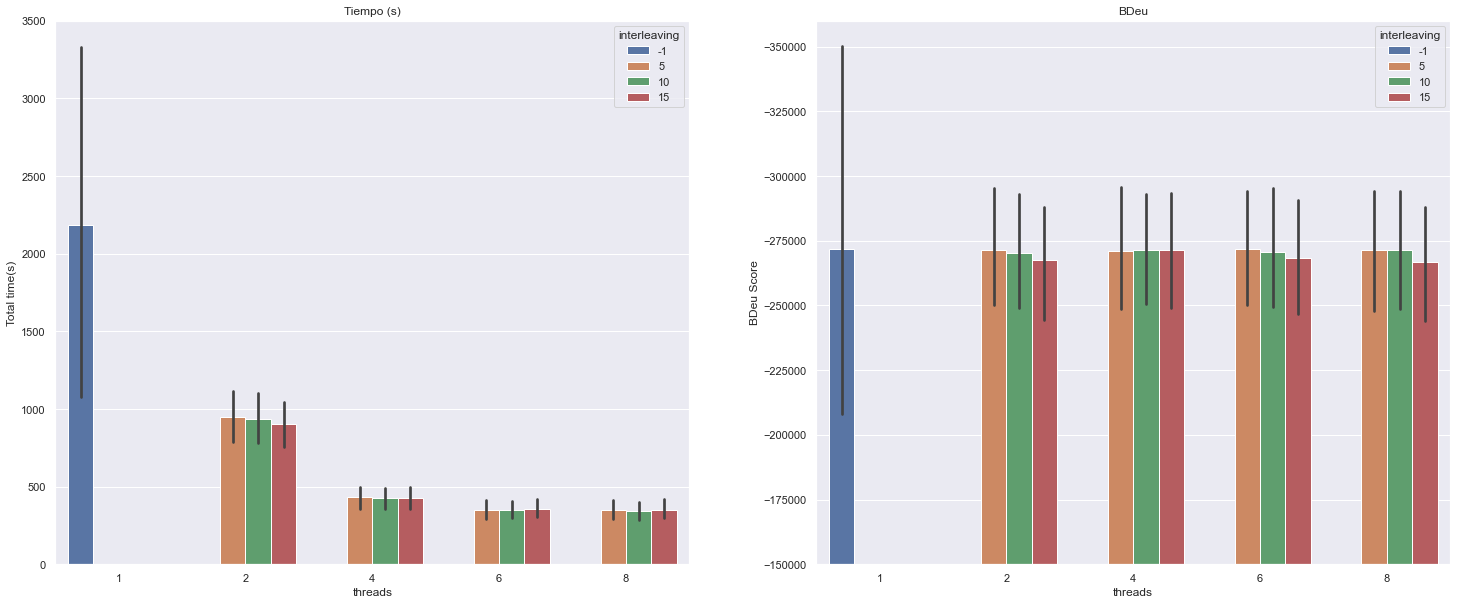

In [214]:
fig, axs = plt.subplots(ncols=2)
# use standard deviation as ci
sns.barplot(data=df, x="threads", y='Total time(s)', ax=axs[0], hue="interleaving")
plt.ylim(-150000,-360000)
sns.barplot(data=df, x="threads", y='BDeu Score', ax=axs[1], hue="interleaving")
axs[0].set_title('Tiempo (s)')
axs[1].set_title('BDeu')

En este caso si usamos la desviación estándar obtenemos un error mucho mayor a la media, dado que es la desviación de todas las variables. Por tanto, no la mostramos:

Text(0.5, 1.0, 'BDeu')

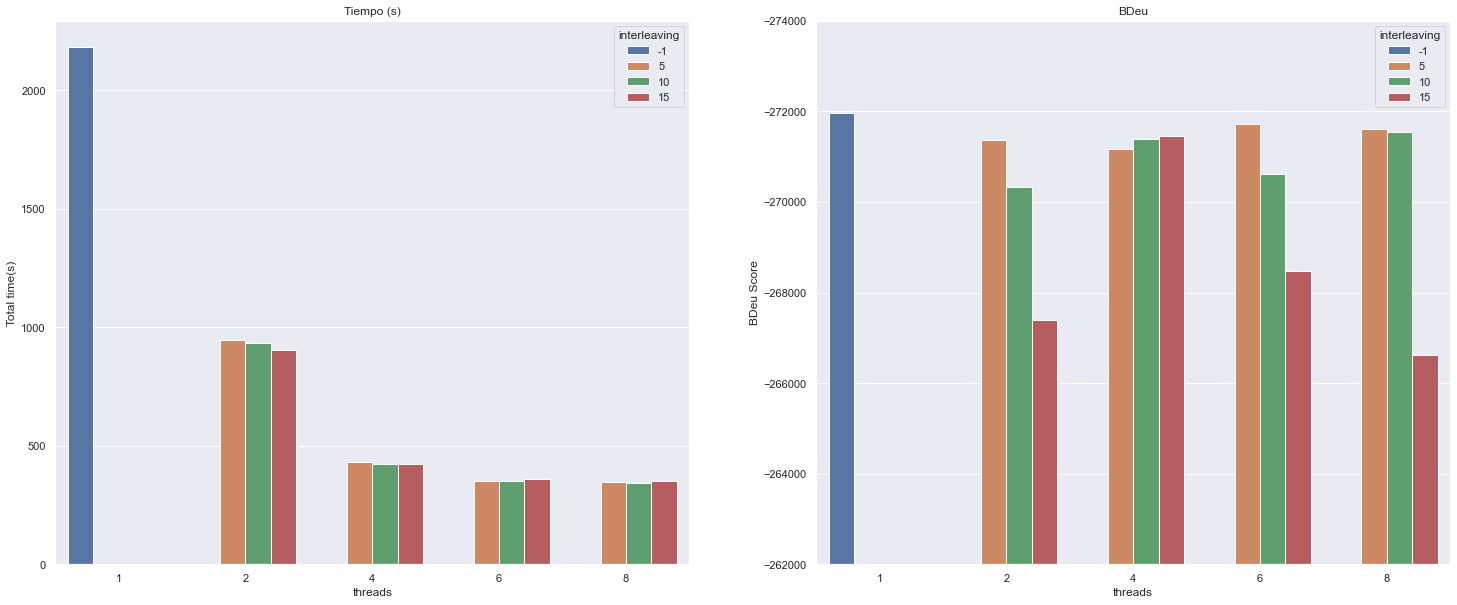

In [215]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df, x="threads", y='Total time(s)', ax=axs[0], hue="interleaving", ci=None)
plt.ylim(-262000,-274000)
sns.barplot(data=df, x="threads", y='BDeu Score', ax=axs[1], hue="interleaving", ci=None)
axs[0].set_title('Tiempo (s)')
axs[1].set_title('BDeu')

### Tiempo de ejecución ``pigs``:

In [216]:
df2 = df[df["network"] == "pigs"]
df2["interleaving"] = df2["interleaving"].replace(5,"05")
df2['thread_inter'] = df2['threads'].astype(str) + '_' + df2['interleaving'].astype(str)

df2 = df2.sort_values(by=['thread_inter'])
df2

,algorithm,network,bbdd,threads,interleaving,seed,SHD,LL Score,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s),thread_inter
13639,GES_BNBuilder,pigs,pigs.xbif50001246_,1,-1,-1,31,-0.752263,-1.718646e+06,78.0,70.0,8.0,1,26492.747,1_-1
14351,GES_BNBuilder,pigs,pigs.xbif50006_,1,-1,-1,33,-0.753079,-1.721662e+06,86.0,76.0,10.0,1,26366.540,1_-1
14233,GES_BNBuilder,pigs,pigs.xbif50005_,1,-1,-1,32,-0.752310,-1.720408e+06,82.0,78.0,4.0,1,26802.857,1_-1
14593,GES_BNBuilder,pigs,pigs.xbif50008_,1,-1,-1,32,-0.752638,-1.719604e+06,76.0,70.0,6.0,1,27650.726,1_-1
14112,GES_BNBuilder,pigs,pigs.xbif50004_,1,-1,-1,24,-0.751575,-1.717172e+06,66.0,62.0,4.0,1,26356.016,1_-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14820,PGESwithStages,pigs,pigs.xbif50009_,8,15,23,5,-1.034394,-1.714521e+06,14.0,14.0,0.0,25,4375.548,8_15
14821,PGESwithStages,pigs,pigs.xbif50009_,8,15,29,12,-1.028970,-1.716501e+06,30.0,26.0,4.0,18,3214.689,8_15
14823,PGESwithStages,pigs,pigs.xbif50009_,8,15,5,9,-1.032015,-1.715222e+06,22.0,20.0,2.0,29,4619.802,8_15
14815,PGESwithStages,pigs,pigs.xbif50009_,8,15,11,29,-1.030961,-1.719305e+06,74.0,66.0,8.0,24,4434.909,8_15


Text(0.5, 1.0, 'BDeu en pigs')

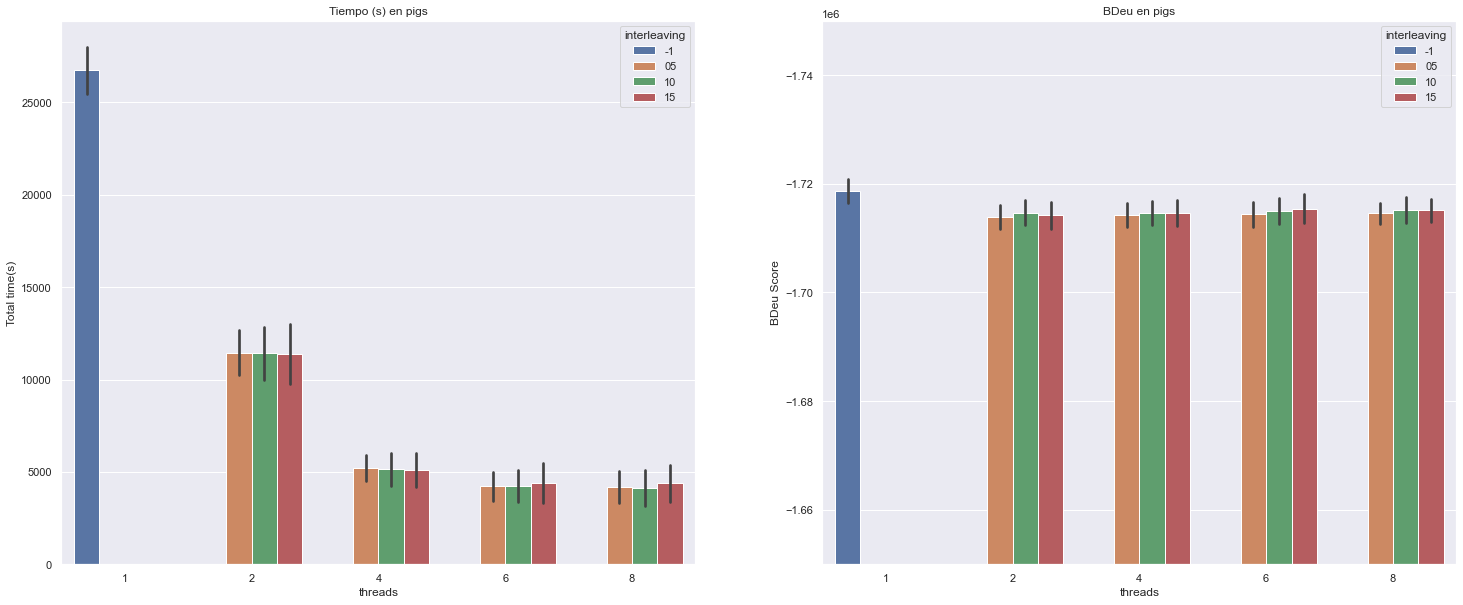

In [217]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df2, x="threads", y='Total time(s)', ax=axs[0], hue="interleaving", ci='sd')
plt.ylim(-1650000,-1750000)
sns.barplot(data=df2, x="threads", y='BDeu Score', ax=axs[1], hue="interleaving", ci='sd')
axs[0].set_title('Tiempo (s) en pigs')
axs[1].set_title('BDeu en pigs')

Text(0.5, 1.0, 'Tiempo en pigs por número de hilos (1 = GES)')

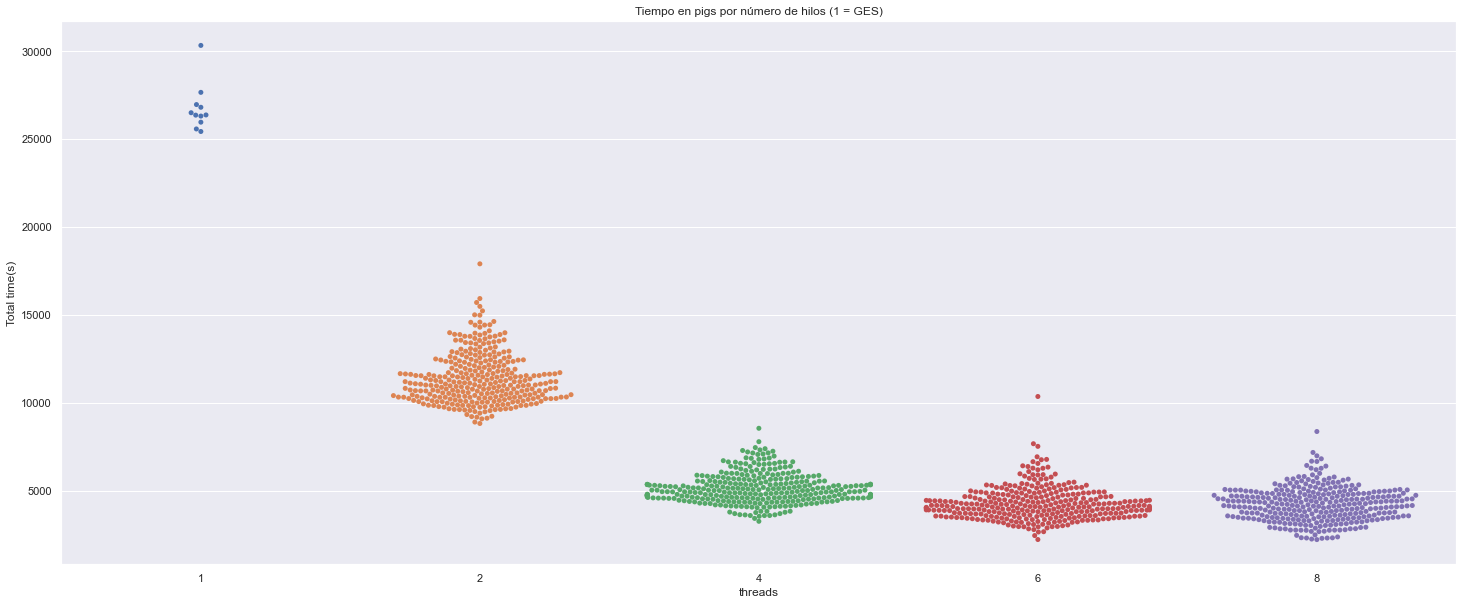

In [218]:
sns.swarmplot(data=df2, x='threads', y='Total time(s)').set_title('Tiempo en pigs por número de hilos (1 = GES)')

Text(0.5, 1.0, 'Tiempo en pigs por número de hilos e interleaving (1 = GES)')

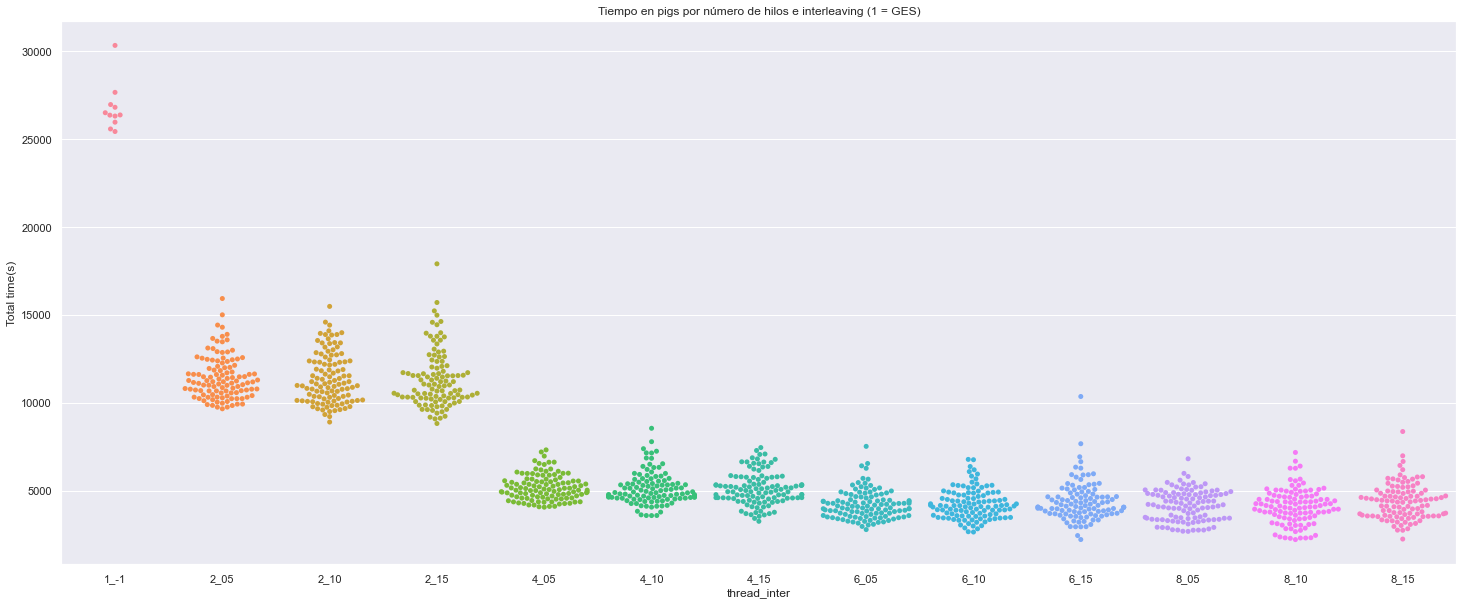

In [219]:
sns.swarmplot(data=df2, x='thread_inter', y='Total time(s)').set_title('Tiempo en pigs por número de hilos e interleaving (1 = GES)')

#### BDeu:

Text(0.5, 1.0, 'BDeu en pigs por número de hilos (1 = GES)')

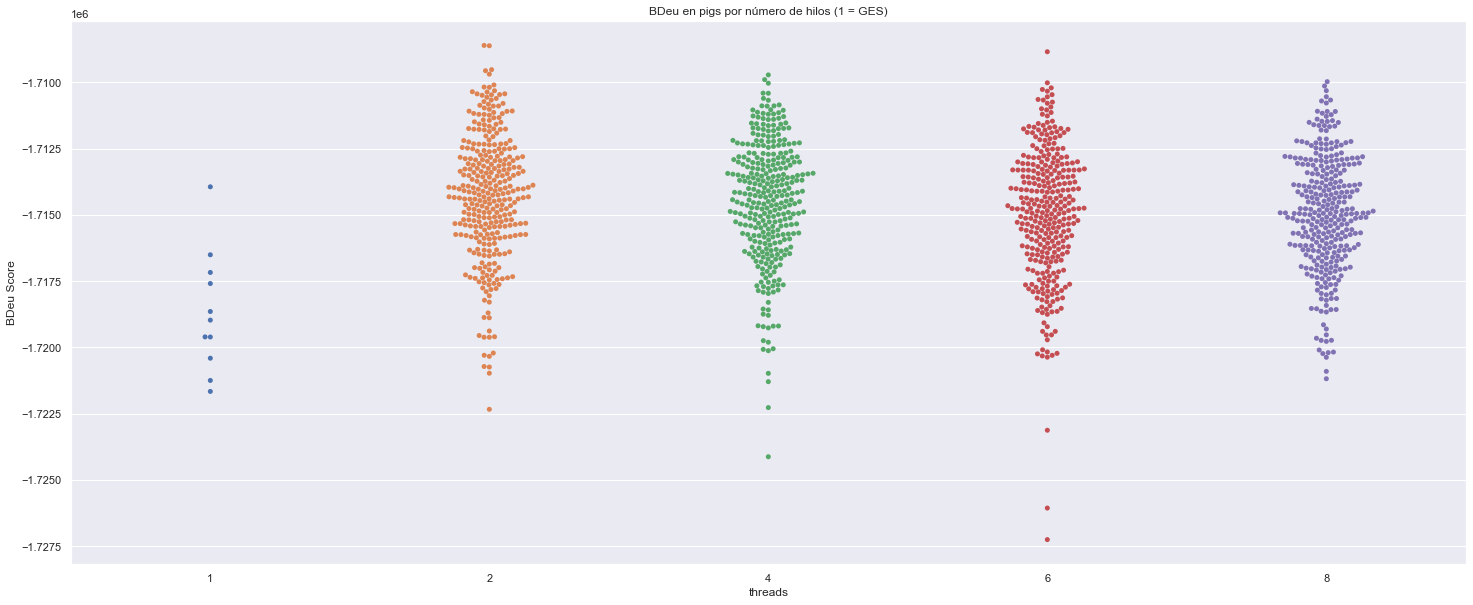

In [220]:
sns.swarmplot(data=df2, x='threads', y='BDeu Score').set_title('BDeu en pigs por número de hilos (1 = GES)')

Text(0.5, 1.0, 'BDeu en pigs por número de hilos e interleaving (1 = GES)')

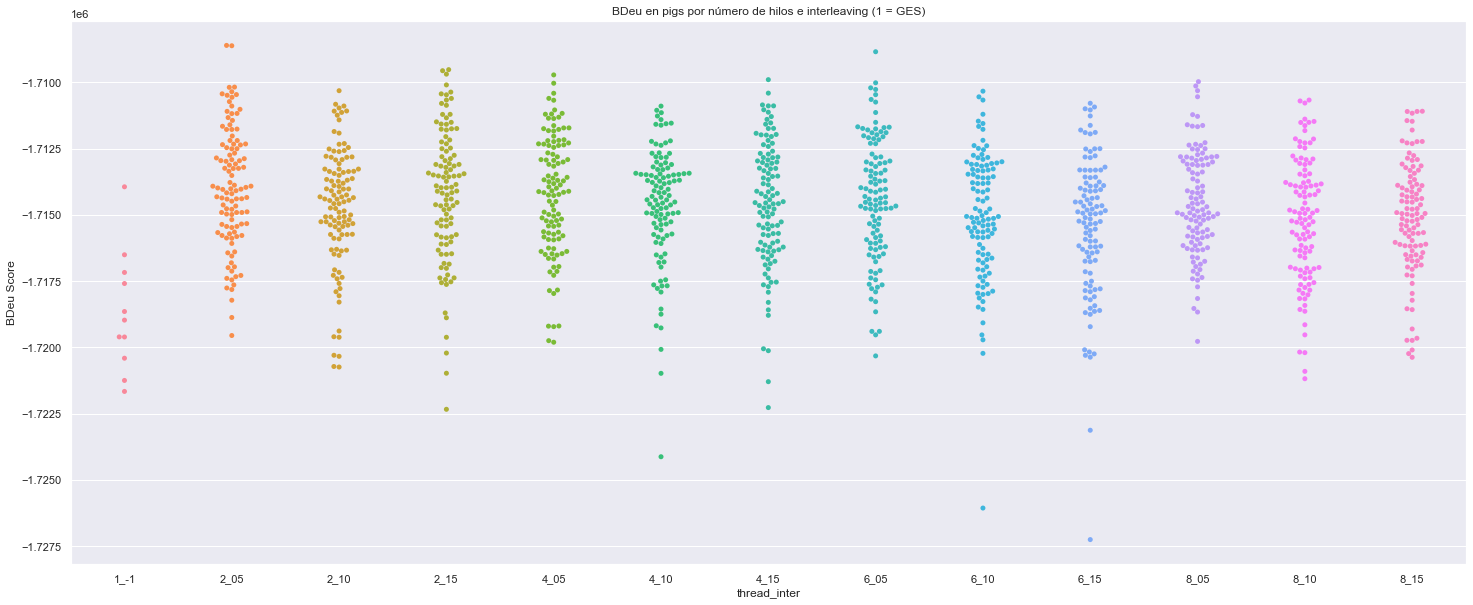

In [221]:
sns.swarmplot(data=df2, x='thread_inter', y='BDeu Score').set_title('BDeu en pigs por número de hilos e interleaving (1 = GES)')

#### Nº de iteraciones

Text(0.5, 1.0, 'Iteraciones en pigs por número de hilos e interleaving (1 = GES)')

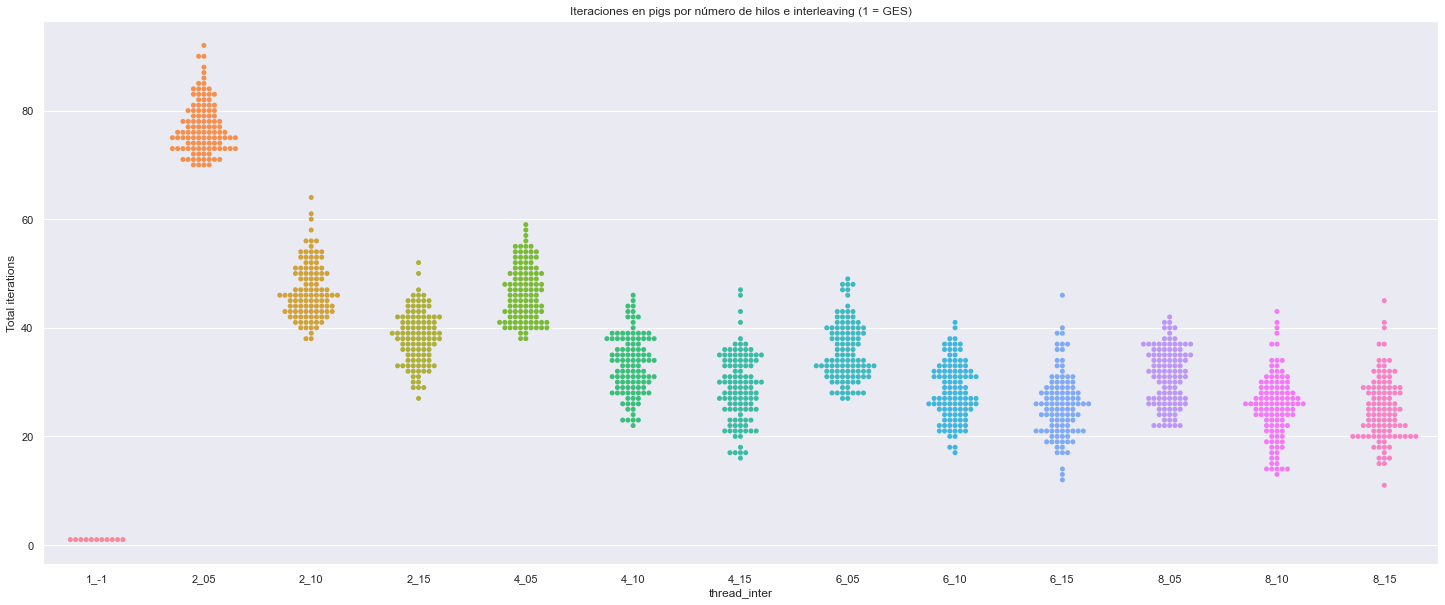

In [222]:
sns.swarmplot(data=df2, x='thread_inter', y='Total iterations').set_title('Iteraciones en pigs por número de hilos e interleaving (1 = GES)')

### Tiempo de ejecución ``andes``:

In [223]:
df2 = df[df["network"] == "andes"]
df2["interleaving"] = df2["interleaving"].replace(5,"05")
df2['thread_inter'] = df2['threads'].astype(str) + '_' + df2['interleaving'].astype(str)

df2 = df2.sort_values(by=['thread_inter'])
df2

,algorithm,network,bbdd,threads,interleaving,seed,SHD,LL Score,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s),thread_inter
1331,GES_BNBuilder,andes,andes.xbif50001246_,1,-1,-1,188,-0.418554,-475749.534899,410.0,54.0,356.0,1,1485.983,1_-1
1932,GES_BNBuilder,andes,andes.xbif50005_,1,-1,-1,180,-0.418835,-475791.029303,390.0,24.0,366.0,1,1438.223,1_-1
2052,GES_BNBuilder,andes,andes.xbif50006_,1,-1,-1,168,-0.419036,-475783.228369,364.0,32.0,332.0,1,1566.836,1_-1
1571,GES_BNBuilder,andes,andes.xbif50002_,1,-1,-1,168,-0.418755,-475935.370240,362.0,10.0,352.0,1,1497.777,1_-1
2530,GES_BNBuilder,andes,andes.xbif_,1,-1,-1,193,-0.423300,-481312.109248,418.0,50.0,368.0,1,1567.176,1_-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,PGESwithStages,andes,andes.xbif50006_,8,15,5,178,-0.545778,-475202.670107,394.0,70.0,324.0,15,358.196,8_15
2393,PGESwithStages,andes,andes.xbif50008_,8,15,17,203,-0.542934,-477602.458048,484.0,124.0,360.0,11,316.065,8_15
1919,PGESwithStages,andes,andes.xbif50004_,8,15,3,171,-0.546573,-474794.623727,368.0,38.0,330.0,10,237.313,8_15
2516,PGESwithStages,andes,andes.xbif50009_,8,15,29,183,-0.543056,-476313.617496,404.0,70.0,334.0,11,282.787,8_15


Text(0.5, 1.0, 'BDeu en andes')

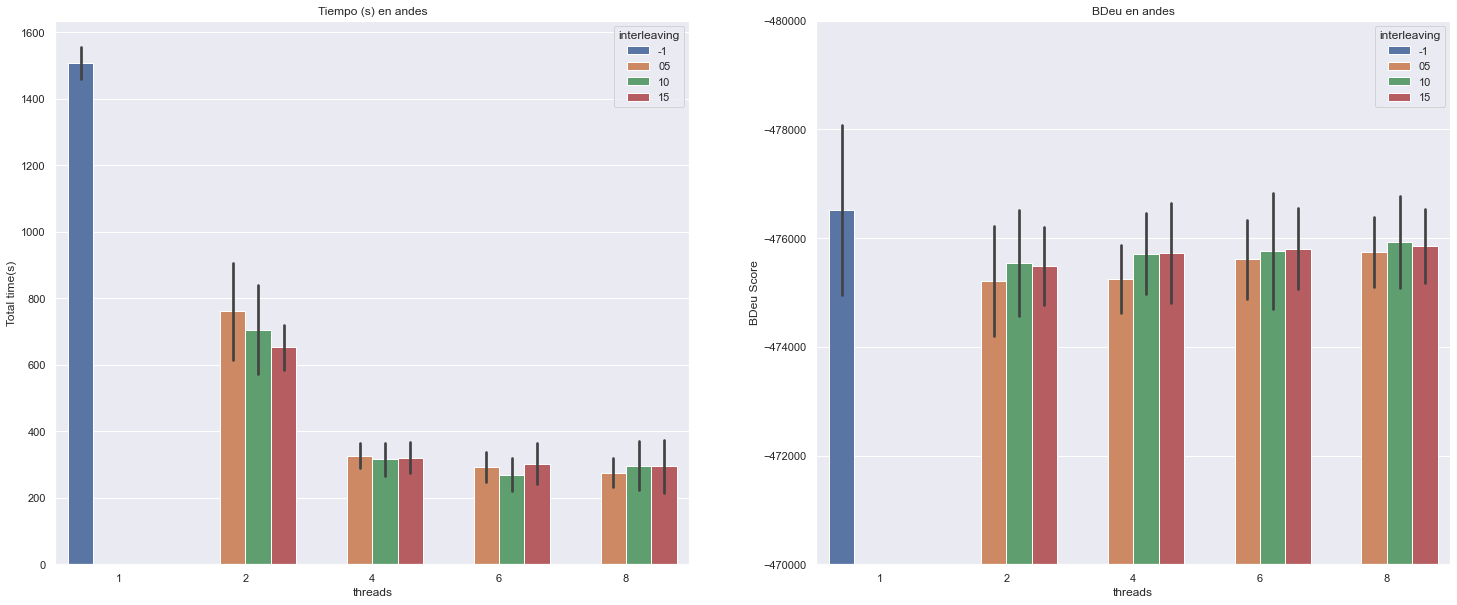

In [224]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df2, x="threads", y='Total time(s)', ax=axs[0], hue="interleaving", ci='sd')
plt.ylim(-470000,-480000)
sns.barplot(data=df2, x="threads", y='BDeu Score', ax=axs[1], hue="interleaving", ci='sd')
axs[0].set_title('Tiempo (s) en andes')
axs[1].set_title('BDeu en andes')

Text(0.5, 1.0, 'Tiempo en andes por número de hilos (1 = GES)')

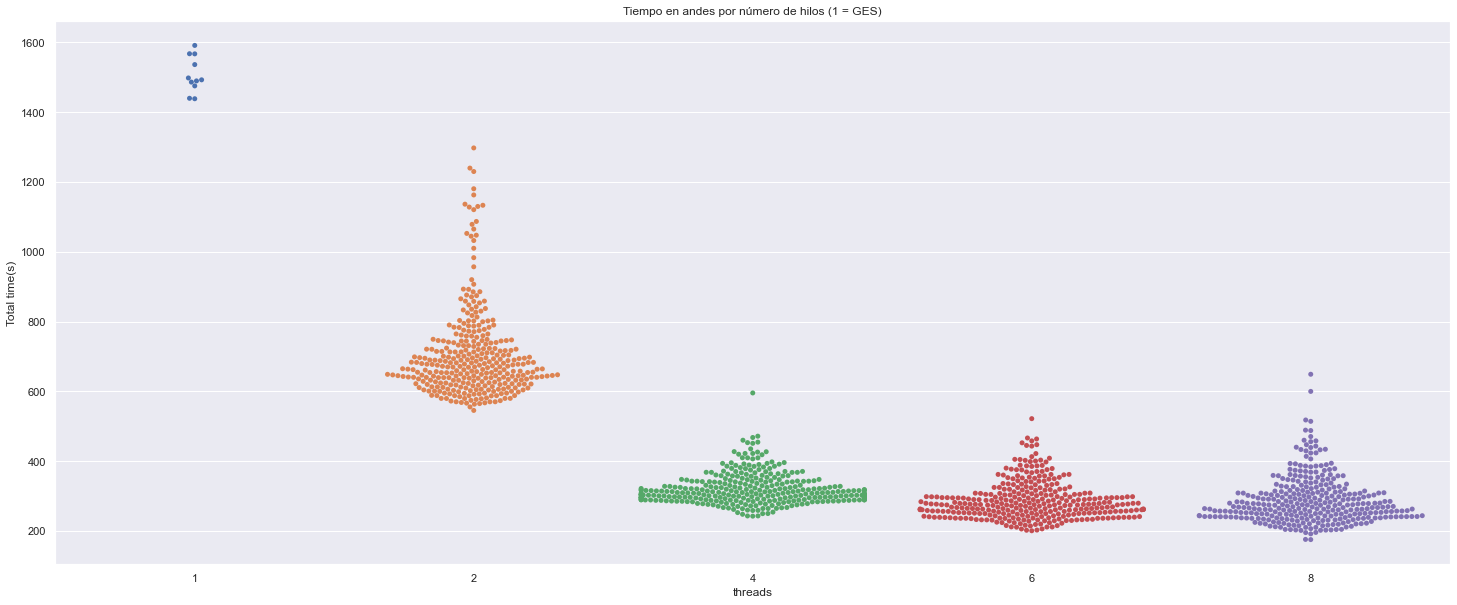

In [225]:
sns.swarmplot(data=df2, x='threads', y='Total time(s)').set_title('Tiempo en andes por número de hilos (1 = GES)')

Text(0.5, 1.0, 'Tiempo en andes por número de hilos e interleaving (1 = GES)')

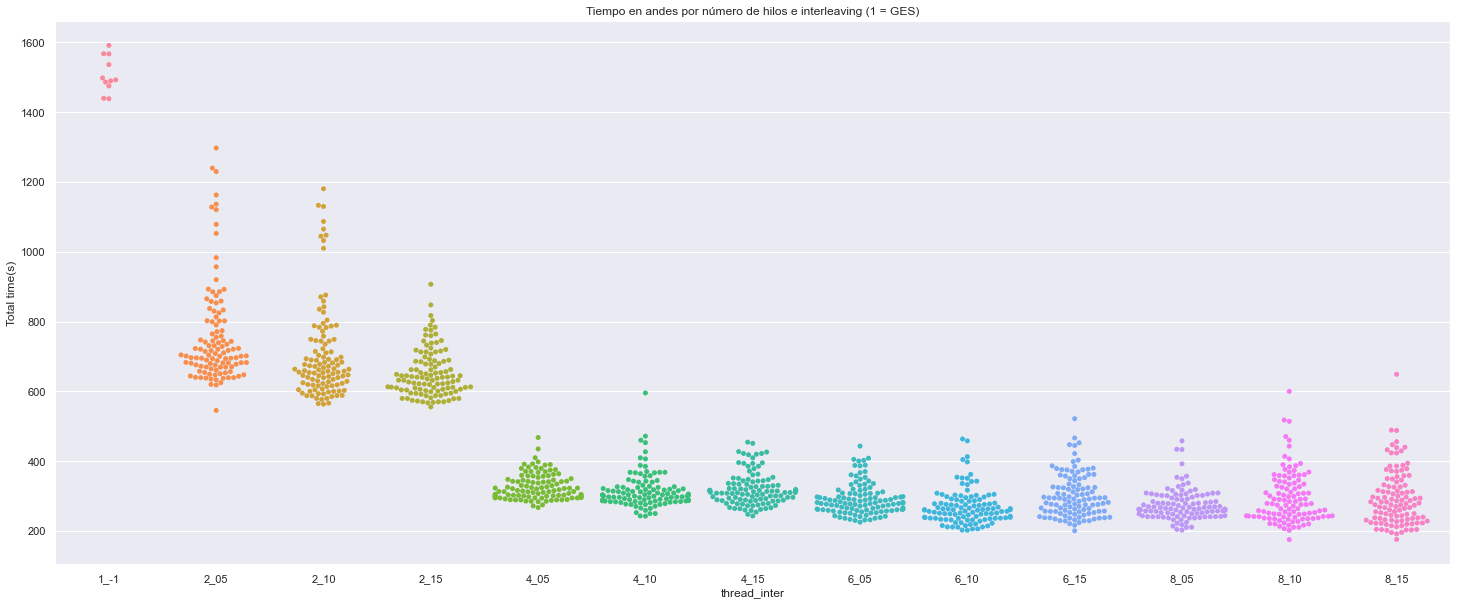

In [226]:
sns.swarmplot(data=df2, x='thread_inter', y='Total time(s)').set_title('Tiempo en andes por número de hilos e interleaving (1 = GES)')

#### BDeu:

Text(0.5, 1.0, 'BDeu en andes por número de hilos (1 = GES)')

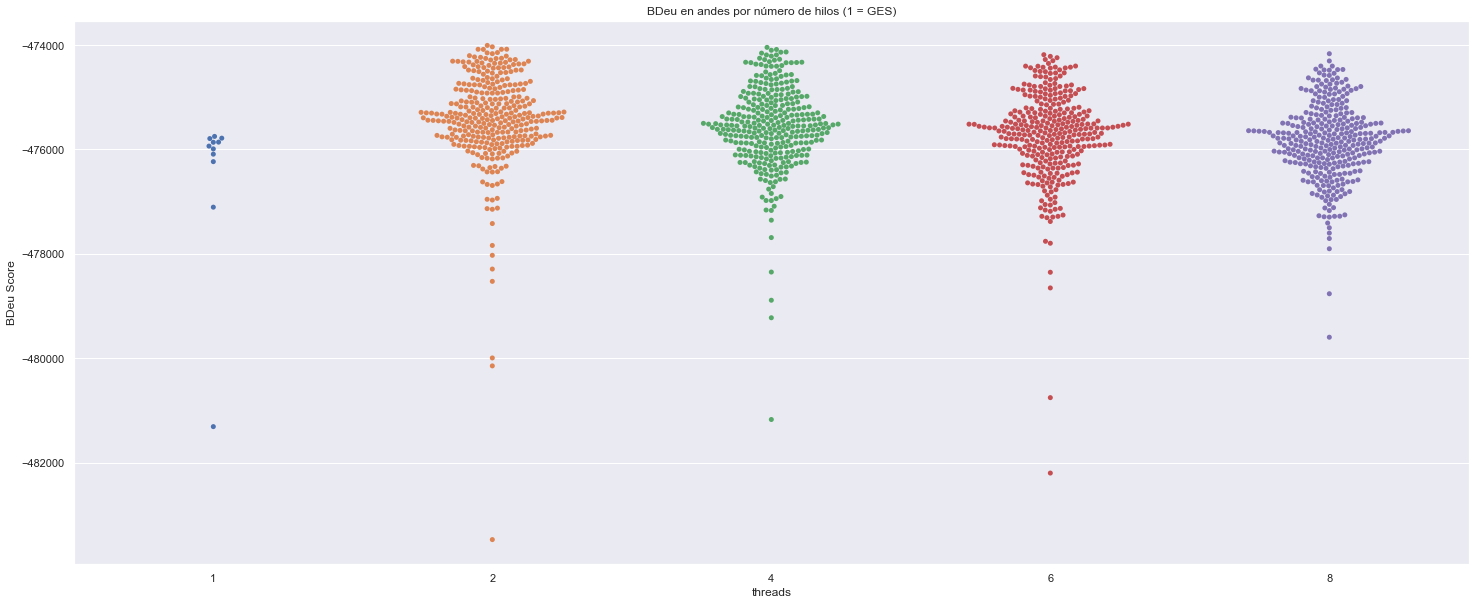

In [227]:
sns.swarmplot(data=df2, x='threads', y='BDeu Score').set_title('BDeu en andes por número de hilos (1 = GES)')

Text(0.5, 1.0, 'BDeu en andes por número de hilos e interleaving (1 = GES)')

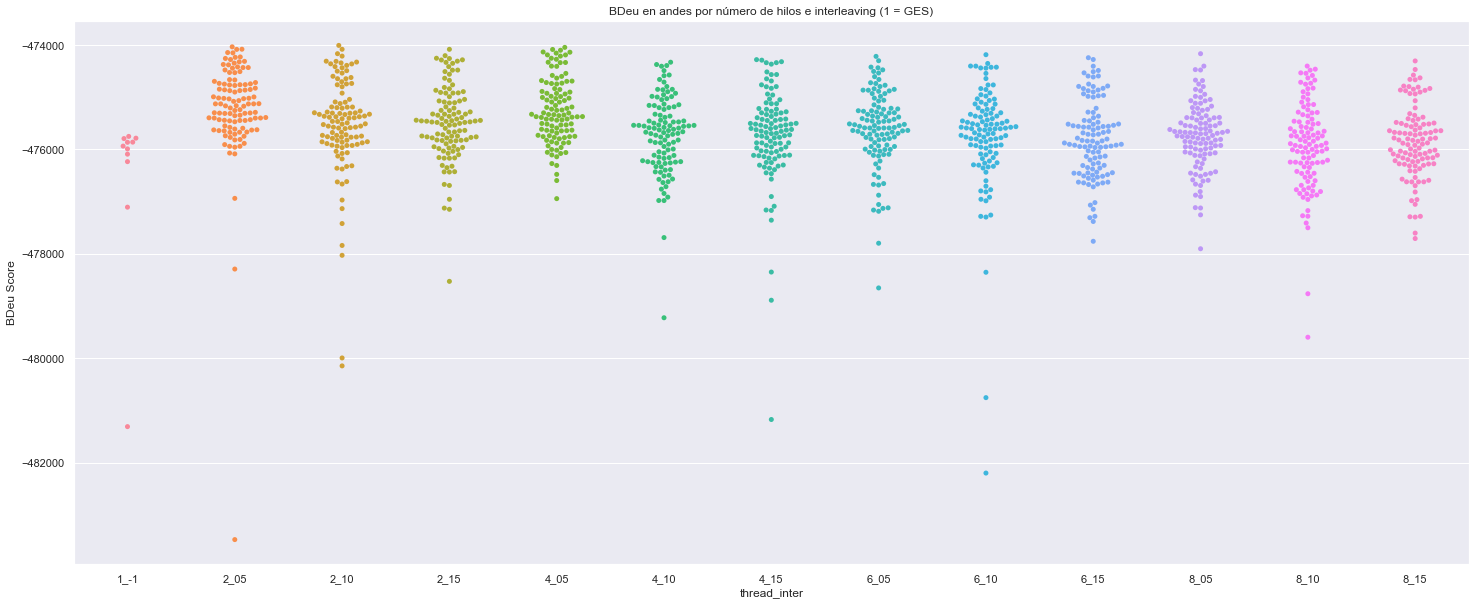

In [228]:
sns.swarmplot(data=df2, x='thread_inter', y='BDeu Score').set_title('BDeu en andes por número de hilos e interleaving (1 = GES)')

#### Nº de iteraciones

Text(0.5, 1.0, 'Iteraciones en andes por número de hilos e interleaving (1 = GES)')

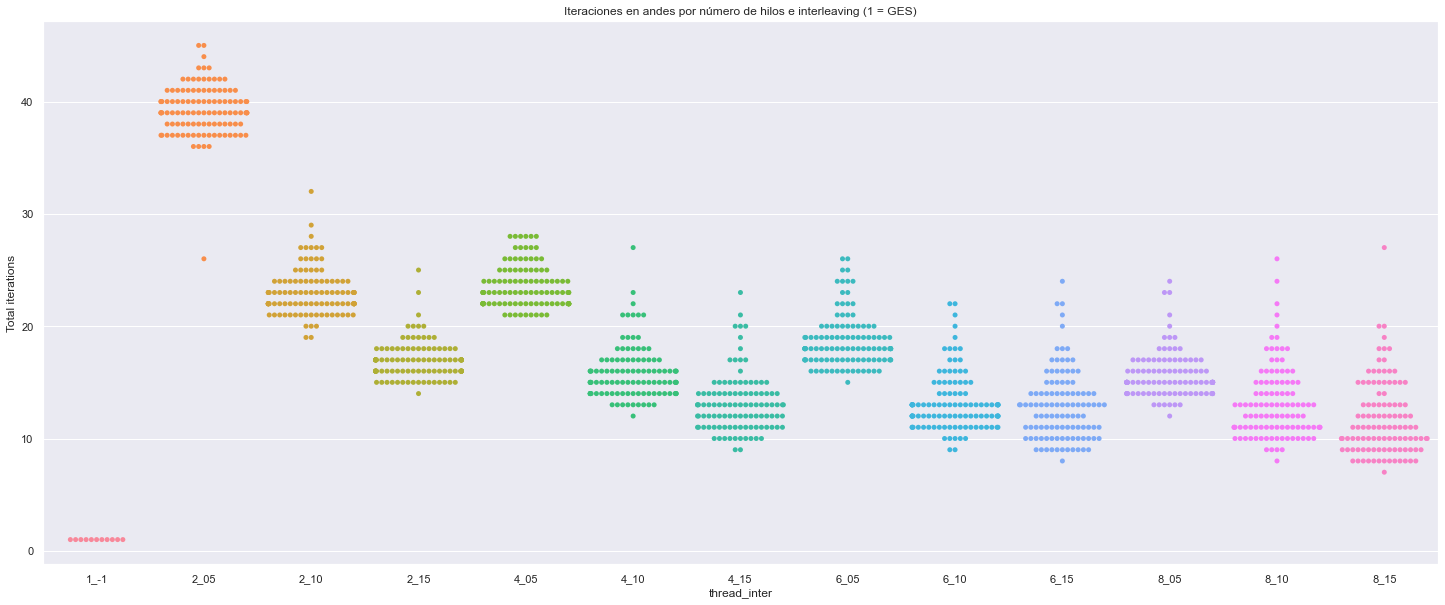

In [229]:
sns.swarmplot(data=df2, x='thread_inter', y='Total iterations').set_title('Iteraciones en andes por número de hilos e interleaving (1 = GES)')